In [1]:
#installing the current version of tensorflow
!pip install tensorflow

In [2]:
#import tensorflow and check the version
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.1


In [1]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset from pickled files
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("W.pickle","rb")
W = pickle.load(pickle_in)
W=np.asarray(W)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [3]:
#split into train and test datasets
X_train,X_test,W_train,W_test,y_train,y_test=train_test_split(X,W,y,train_size=0.8,test_size=0.2,random_state=123)
print(X_test.shape)
print(W_test.shape)
print(y_test.shape)

(1657, 64, 64, 1)
(1657,)
(1657, 5)


In [4]:
from tensorflow.keras.utils import plot_model
#from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0

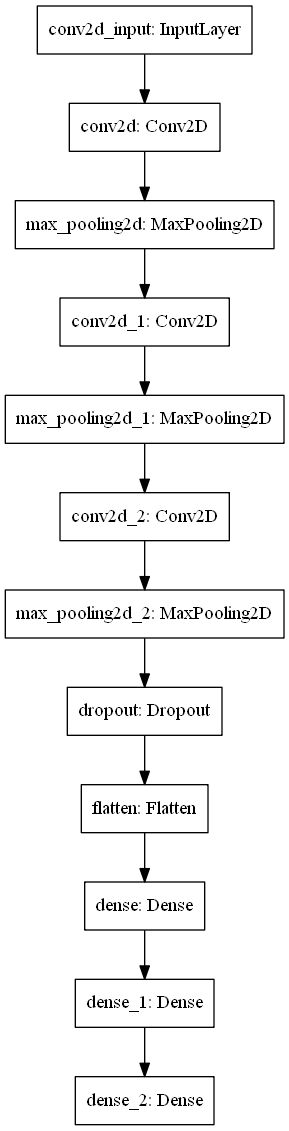

In [5]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()

plot_model(model, to_file='convolutional_neural_network.png')

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [7]:
import time
start = time.perf_counter()
print(y_train.shape)

history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          callbacks=None,class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6626, 5)
Epoch 1/20
94/94 [==============================] - 24s 253ms/step - loss: 2.0737 - accuracy: 0.5202 - val_loss: 0.8887 - val_accuracy: 0.7376
Epoch 2/20
94/94 [==============================] - 24s 251ms/step - loss: 0.7163 - accuracy: 0.7640 - val_loss: 0.6230 - val_accuracy: 0.7843
Epoch 3/20
94/94 [==============================] - 23s 249ms/step - loss: 0.5356 - accuracy: 0.8063 - val_loss: 0.5270 - val_accuracy: 0.8145
Epoch 4/20
94/94 [==============================] - 24s 251ms/step - loss: 0.4528 - accuracy: 0.8403 - val_loss: 0.4257 - val_accuracy: 0.8748
Epoch 5/20
94/94 [==============================] - 24s 251ms/step - loss: 0.3692 - accuracy: 0.8731 - val_loss: 0.3888 - val_accuracy: 0.8763
Epoch 6/20
94/94 [==============================] - 24s 252ms/step - loss: 0.3452 - accuracy: 0.8831 - val_loss: 0.3353 - val_accuracy: 0.9020
Epoch 7/20
94/94 [==============================] - 24s 250ms/step - loss: 0.3071 - accuracy: 0.8979 - val_loss: 0.3331 - val_accura

In [8]:
score = model.evaluate(X_train, y_train, verbose=1)

208/208 [==============================] - 8s 39ms/step - loss: 0.0814 - accuracy: 0.9749


In [9]:
print(score)

[0.0814380943775177, 0.9749471545219421]


In [10]:
score = model.evaluate(X_test, y_test, verbose=1)

52/52 [==============================] - 2s 35ms/step - loss: 0.2727 - accuracy: 0.9246


In [11]:
print(score)

[0.27270257472991943, 0.9245624542236328]


In [12]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
#y_pred=model.predict_classes(X_test)
print(model.predict(X_test))
print(model.predict((X_test))[1][1])
y_pred=np.argmax(model.predict((X_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#b=np.zeros(len(y_train)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
    a[i]=np.where(y_test[i]==1)[0][0]
print(a)
#for j in range(0,len(y_train)):
#    b[i]=np.where(y_train[j]==1)[0][0]

#print(b)
con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

#con_mat_1 = tfm.confusion_matrix(labels=b, predictions=y_pred).numpy()
#con_mat_norm_1 = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df_1 = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

[[1.14799082e-06 5.46258505e-08 5.75936519e-06 9.99992967e-01
  1.57085481e-07]
 [1.52939858e-04 7.58123377e-08 7.23148041e-05 5.56191844e-05
  9.99719083e-01]
 [1.29193995e-05 4.47756975e-06 9.35689895e-05 4.08653577e-04
  9.99480426e-01]
 ...
 [6.31068979e-05 7.06584387e-07 1.41570093e-02 9.85775590e-01
  3.59814248e-06]
 [2.14008775e-08 3.09613579e-09 1.46942645e-08 1.00000000e+00
  3.59943075e-10]
 [2.21330920e-05 1.14106352e-03 3.81873251e-04 1.55251182e-04
  9.98299658e-01]]
7.581234e-08
[3 4 4 ... 3 3 4]


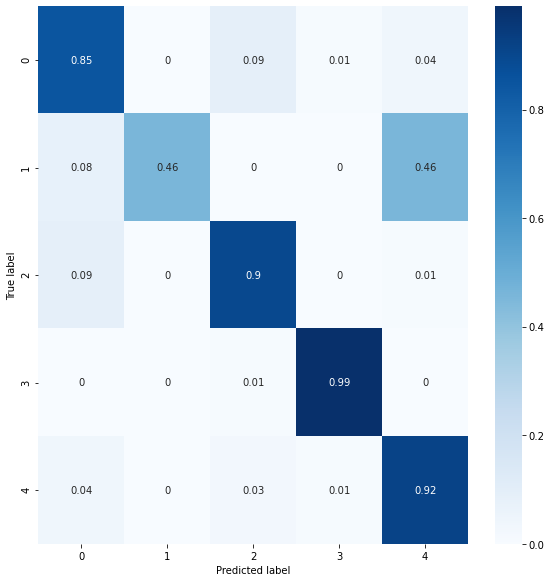

[0.27270257472991943, 0.9245624542236328]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
score = model.evaluate((X_test), y_test, verbose=0)
#score = model.evaluate((X_test), y_test, verbose=0)
print(score)

In [15]:
a=np.zeros(len(y)).astype(int)
for i in range(0,len(y)):
  a[i]=np.where(y[i]==1)[0][0]
print(a)

[4 3 2 ... 3 2 4]


In [16]:
import pandas as pd
pd.Series(a)

0       4
1       3
2       2
3       4
4       0
       ..
8278    3
8279    0
8280    3
8281    2
8282    4
Length: 8283, dtype: int32

In [17]:
from tensorflow.keras.models import load_model
model.save('MeatCut.h5')

In [18]:
model.save_weights('MeatCut_weights.h5')

In [19]:
len(a)

8283

In [21]:
df = pd.read_csv('E:/Meat_Excels/NameandLabels.csv')

In [22]:
df['predicted_classes_CNN'] = a

In [23]:
df.to_csv('E:/Meat_Excels/MeatLabelsPredicted.csv')